In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import random

## 0、数据处理成csv形式

In [3]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationNum', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex',
          'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry', 'income']
# 第一行是非法数据
df_train_set = pd.read_csv('./adult.data', names=columns)
df_test_set = pd.read_csv('./adult.test', names=columns, skiprows=1)

print(df_train_set.head())
print(df_test_set.head())
df_train_set.to_csv('./train_adult.csv', index=False)
df_test_set.to_csv('./test_adult.csv', index=False)

   age          workclass  fnlwgt   education  educationNum  \
0   39          State-gov   77516   Bachelors            13   
1   50   Self-emp-not-inc   83311   Bachelors            13   
2   38            Private  215646     HS-grad             9   
3   53            Private  234721        11th             7   
4   28            Private  338409   Bachelors            13   

         maritalStatus          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capitalGain  capitalLoss  hoursPerWeek   nativeCountry  income  
0         2174            0            40   United-States   <=50K  
1         

In [4]:
df_test_set.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
len(df_train_set), len(df_test_set), len(df_test_set.columns)

(32561, 16281, 15)

## 1、数据读取

In [6]:
df_train_set = pd.read_csv('./train_adult.csv')
df_train_set

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## 2、数据预处理

### 2.1 删除对应属性

In [7]:
# fnlwgt列用处不大，educationNum与education类似
df_train_set.drop(['fnlwgt', 'educationNum'], axis=1, inplace=True) 
df_test_set.drop(['fnlwgt', 'educationNum'], axis=1, inplace=True)
print(df_train_set.columns)

Index(['age', 'workclass', 'education', 'maritalStatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss',
       'hoursPerWeek', 'nativeCountry', 'income'],
      dtype='object')


### 2.2 重复行记录处理

In [8]:
df_train_set.drop_duplicates(inplace=True) # 去除重复行

In [9]:
df_train_set

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### 2.3 缺失值处理

In [10]:
# 输出有缺失值的数据行
df_train_set[df_train_set.isna().values == True] 

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income


In [11]:
# 去除空行 
df_train_set.dropna(inplace=True) 
df_test_set.dropna(inplace=True)

### 2.4 查看列类型

In [12]:
df_train_set.dtypes

age               int64
workclass        object
education        object
maritalStatus    object
occupation       object
relationship     object
race             object
sex              object
capitalGain       int64
capitalLoss       int64
hoursPerWeek      int64
nativeCountry    object
income           object
dtype: object

### 2.5 异常值处理

In [13]:
# 查找异常值, 避免与正则表达式的?冲突需要转义
df_train_set[df_train_set['workclass'].str.contains(r'\?', regex=True)] 
df_test_set[df_test_set['workclass'].str.contains(r'\?', regex=True)]

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
6,29,?,HS-grad,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
13,58,?,HS-grad,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K.
22,72,?,7th-8th,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K.
35,65,?,HS-grad,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16121,61,?,Some-college,Married-civ-spouse,?,Husband,White,Male,0,0,14,United-States,<=50K.
16208,21,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
16239,73,?,HS-grad,Married-civ-spouse,?,Husband,White,Male,0,0,25,Canada,<=50K.
16251,81,?,Assoc-voc,Married-civ-spouse,?,Husband,White,Male,2936,0,20,United-States,<=50K.


In [14]:
df_train_set=df_train_set[~df_train_set['workclass'].str.contains(r'\?', regex=True)]
df_test_set=df_test_set[~df_test_set['workclass'].str.contains(r'\?', regex=True)]
df_train_set

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [15]:
#删除有异常值的行
new_columns = ['workclass', 'education', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex', 'nativeCountry', 'income']
for col in new_columns:
        df_train_set = df_train_set[~df_train_set[col].str.contains(r'\?', regex=True)]
        df_test_set = df_test_set[~df_test_set[col].str.contains(r'\?', regex=True)]
df_train_set.head()

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 2.6 数据可视化，以年龄为例

<Axes: ylabel='Frequency'>

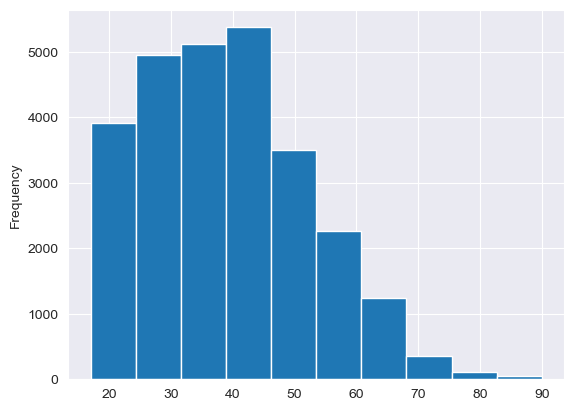

In [16]:
df_train_set['age'].plot.hist()

<Axes: >

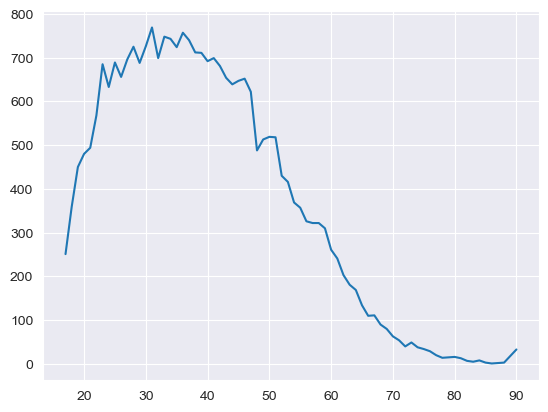

In [17]:
df_train_set['age'].value_counts().sort_index().plot.line()

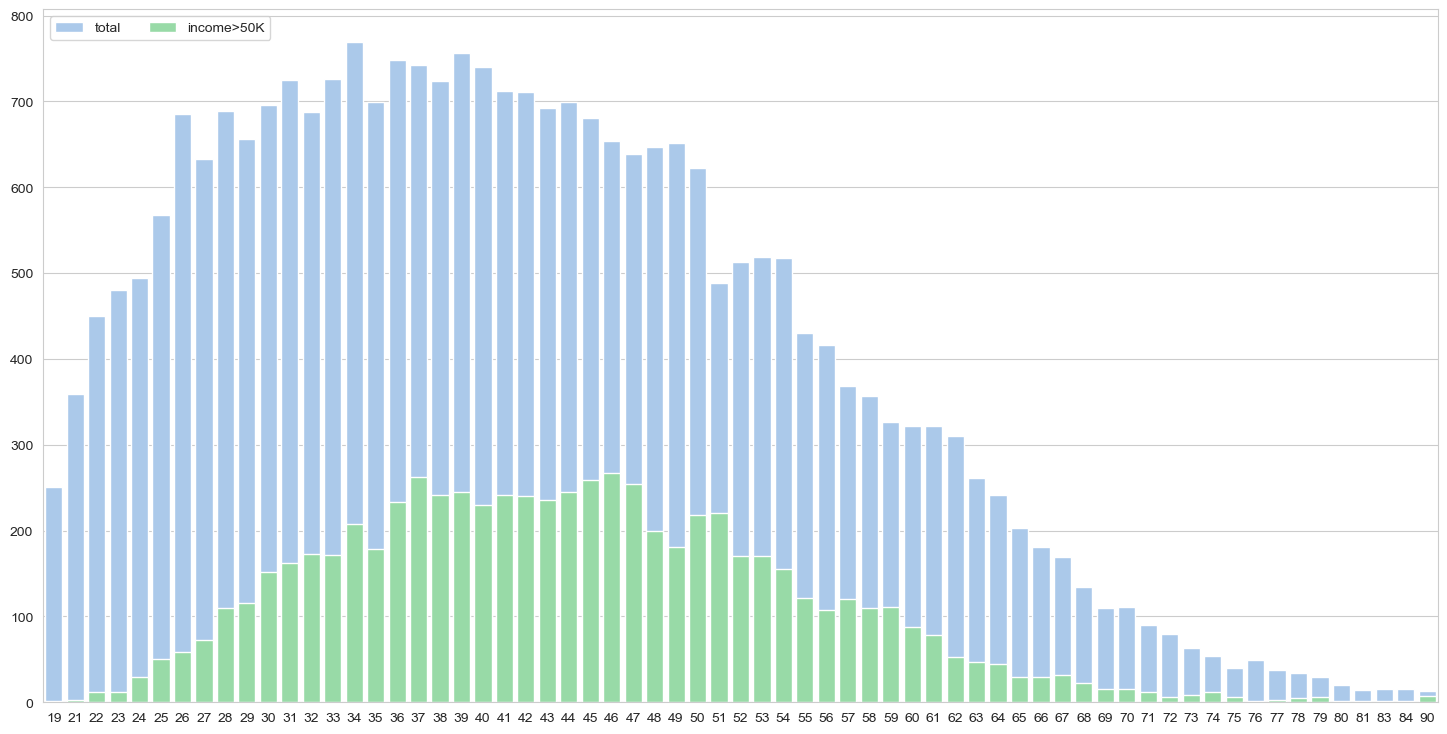

In [18]:
# 画出年龄与收入的关系

df_train_set = df_train_set.reset_index(drop=True) #重置索引
df_train_set['age'].isnull() == True
s = df_train_set['age'].value_counts()
k = df_train_set['age'][df_train_set['income'] == ' >50K'].value_counts()
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(18, 9))
sns.set_color_codes("pastel")
sns.barplot(x=s.index,y=s.values,label='total',color="b")
sns.barplot(x=k.index,y=k.values,label='income>50K',color="g")
ax.legend(ncol=2, loc="upper left", frameon=True)

### 2.7 连续型变量处理

In [19]:
continuous_column = ['age', 'capitalGain', 'capitalLoss', 'hoursPerWeek']

In [20]:
df_train_set['age'].max(), df_train_set['age'].min()

(90, 17)

In [21]:
df_train_set['age'].head() 

0    39
1    50
2    38
3    53
4    28
Name: age, dtype: int64

In [22]:
# 分箱区间左开右闭 (0, 25], (25, 50], ...
bins = [0, 25, 50, 75, 100] 
df_train_set['age'] = pd.cut(df_train_set['age'], bins, labels=False)
df_test_set['age'] = pd.cut(df_test_set['age'], bins, labels=False)

In [23]:
df_train_set['age'].head() 

0    1
1    1
2    1
3    2
4    1
Name: age, dtype: int64

In [24]:
# 处理capitalGain, capitalLoss
print(df_train_set['capitalGain'].max(), df_train_set['capitalGain'].min())
print(df_test_set['capitalLoss'].max(), df_test_set['capitalLoss'].min())


99999 0
3770 0


In [25]:
# 调查capitalGain和capitalLoss大部分都是0, 为了方便处理, 我们将其转换为二值型变量
df_train_set['capitalGain'] = df_train_set['capitalGain'].apply(lambda x: 1 if x > 0 else 0)
df_train_set['capitalLoss'] = df_train_set['capitalLoss'].apply(lambda x: 1 if x > 0 else 0)
df_test_set['capitalGain'] = df_test_set['capitalGain'].apply(lambda x: 1 if x > 0 else 0)
df_test_set['capitalLoss'] = df_test_set['capitalLoss'].apply(lambda x: 1 if x > 0 else 0)


<Axes: ylabel='Frequency'>

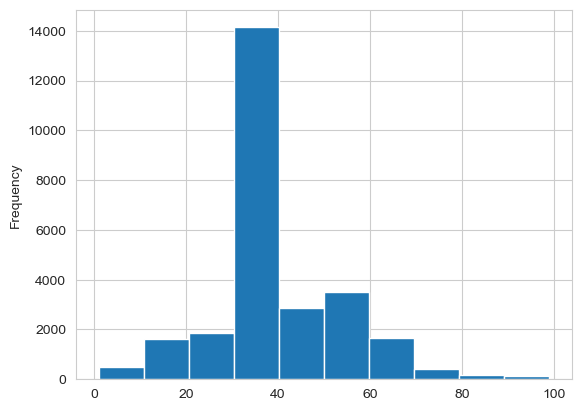

In [26]:
# 处理hoursPerWeek
df_train_set['hoursPerWeek'].plot.hist()

In [27]:
# 分箱区间左开右闭 (0, 30], (30, 60], ...
bins = [0, 30, 60, 90, 120]
df_train_set['hoursPerWeek'] = pd.cut(df_train_set['hoursPerWeek'], bins, labels=False)
df_test_set['hoursPerWeek'] = pd.cut(df_test_set['hoursPerWeek'], bins, labels=False)
df_train_set['hoursPerWeek']

0        1
1        0
2        1
3        1
4        1
        ..
26899    1
26900    1
26901    1
26902    1
26903    1
Name: hoursPerWeek, Length: 26904, dtype: int64

###2.8 离散型变量处理

In [28]:
discrete_column = ['workclass', 'education', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex', 'nativeCountry', 'income']

In [29]:
df_train_set['workclass'].value_counts()

 Private             19214
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: workclass, dtype: int64

In [30]:
df_train_set['workclass'].head() #展示前五条

0            State-gov
1     Self-emp-not-inc
2              Private
3              Private
4              Private
Name: workclass, dtype: object

In [31]:
df_train_set['workclass'].value_counts().keys()

Index([' Private', ' Self-emp-not-inc', ' Local-gov', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay'],
      dtype='object')

In [32]:
workclass_mapping = {' Private': 0, ' Self-emp-not-inc': 1, ' Self-emp-inc': 1, ' Local-gov': 2, ' State-gov': 2, ' Federal-gov': 2, ' Without-pay': 3, ' Never-worked': 3}
df_train_set['workclass'] = df_train_set['workclass'].map(workclass_mapping)
df_test_set['workclass'] = df_test_set['workclass'].map(workclass_mapping)

In [33]:
df_train_set['workclass'].head()

0    2
1    1
2    0
3    0
4    0
Name: workclass, dtype: int64

In [34]:
# 处理其他离散型变量
edcation_map = {' Preschool':0, ' 1st-4th':0, ' 5th-6th':1, ' 7th-8th':1, ' 9th':1, ' 10th':2, ' 11th':2, ' 12th':2, ' HS-grad':2, ' Some-college':3, ' Assoc-voc':3, ' Assoc-acdm':3, ' Bachelors':4, ' Masters':5, ' Prof-school':6, ' Doctorate':6}
df_train_set['education'] = df_train_set['education'].map(edcation_map)
df_test_set['education'] = df_test_set['education'].map(edcation_map)

maritalStatus_map = {' Never-married':0, ' Married-civ-spouse':1, ' Married-spouse-absent':1, ' Separated':2, ' Divorced':2, ' Widowed':2, ' Married-AF-spouse':1}
df_train_set['maritalStatus'] = df_train_set['maritalStatus'].map(maritalStatus_map)
df_test_set['maritalStatus'] = df_test_set['maritalStatus'].map(maritalStatus_map)

occupation_map = {' Adm-clerical':0, ' Craft-repair':1, ' Exec-managerial':2, ' Prof-specialty':3, ' Handlers-cleaners':4, ' Machine-op-inspct':5, ' Other-service':6, ' Sales':7, ' Transport-moving':8, ' Farming-fishing':9, ' Tech-support':10, ' Protective-serv':11, ' Priv-house-serv':12, ' Armed-Forces':13}
df_train_set['occupation'] = df_train_set['occupation'].map(occupation_map)
df_test_set['occupation'] = df_test_set['occupation'].map(occupation_map)

relationship_map = {' Not-in-family':0, ' Husband':1, ' Wife':1, ' Own-child':2, ' Unmarried':2, ' Other-relative':2}
df_train_set['relationship'] = df_train_set['relationship'].map(relationship_map)
df_test_set['relationship'] = df_test_set['relationship'].map(relationship_map)

race_map = {' White':0, ' Black':1, ' Asian-Pac-Islander':2, ' Amer-Indian-Eskimo':3, ' Other':4}
df_train_set['race'] = df_train_set['race'].map(race_map)
df_test_set['race'] = df_test_set['race'].map(race_map)

df_train_set['sex'] = df_train_set['sex'].apply(lambda x: 1 if x == ' Female' else 0)
df_test_set['sex'] = df_test_set['sex'].apply(lambda x: 1 if x == ' Female' else 0)

df_train_set['nativeCountry'] = df_train_set['nativeCountry'].apply(lambda x: 1 if x == ' United-States' else 0)
df_test_set['nativeCountry'] = df_test_set['nativeCountry'].apply(lambda x: 1 if x == ' United-States' else 0)

df_train_set['income'] = df_train_set['income'].apply(lambda x: 1 if x == ' >50K' else 0)
df_test_set['income'] = df_test_set['income'].apply(lambda x: 1 if x == ' >50K.' else 0)

In [35]:
df_train_set

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,1,2,4,0,0,0,0,0,1,0,1,1,0
1,1,1,4,1,2,1,0,0,0,0,0,1,0
2,1,0,2,2,4,0,0,0,0,0,1,1,0
3,2,0,2,1,4,1,1,0,0,0,1,1,0
4,1,0,4,1,3,1,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,2,0,5,1,2,1,0,0,0,0,1,1,1
26900,0,0,3,0,11,0,0,0,0,0,1,1,0
26901,1,0,3,1,10,1,0,1,0,0,1,1,0
26902,2,0,2,2,0,2,0,1,0,0,1,1,0


In [36]:
df_test_set

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,0,0,2,0,5,2,1,0,0,0,1,1,0
1,1,0,2,1,9,1,0,0,0,0,1,1,0
2,1,2,3,1,11,1,0,0,0,0,1,1,1
3,1,0,3,1,5,1,1,0,1,0,1,1,1
5,1,0,2,0,6,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,1,0,4,0,3,2,0,0,0,0,1,1,0
16276,1,0,4,2,3,0,0,1,0,0,1,1,0
16278,1,0,4,1,3,1,0,0,0,0,1,1,0
16279,1,0,4,2,0,2,2,0,1,0,1,1,0


In [37]:
def one_hot_encode(df):
    encoded_df = pd.DataFrame()
    for column in df.columns:
        if len(df[column].unique()) > 2:
            one_hot = pd.get_dummies(df[column], prefix=column)
            encoded_df = pd.concat([encoded_df, one_hot], axis=1)
        else:
            encoded_df[column] = df[column]
    return encoded_df

df_train_set = one_hot_encode(df_train_set)
df_test_set = one_hot_encode(df_test_set)

## 3. 构造决策树，进行训练

In [89]:
class DecisionTree:
    def __init__(self, index=None, value=None, left=None, right=None, height=None):
        self.index = index
        self.value = value
        self.left = left
        self.right = right
        self.height = height
        
def calc_gini(df):
    """
    计算数据集的基尼指数
    该题的情况是二分类问题，但我们还是用通用的公式计算
    :param df: 数据集
    :return: 基尼指数
    """
    gini = 1
    for label in df['income'].value_counts().keys():
        prob = len(df[df['income'] == label]) / len(df)
        gini -= prob ** 2
    return gini

def split_dataset(df, index, value):
    """
    按照给定的列划分数据集
    :param df: 原始数据集
    :param index: 指定特征的列索引
    :param value: 指定特征的值
    :return: 切分后的数据集
    """
    df_left = df[df.iloc[:, index] == value].drop(df.columns[index], axis=1)
    df_right = df[df.iloc[:, index] != value].drop(df.columns[index], axis=1)
    return df_left, df_right
    
def choose_best_feature_to_split(df):
    """
    选择最好的特征进行分裂
    仍然采用通用公式,实际上数据是二分类的
    :param df: 数据集
    :return: best_value:(分裂特征的index, 特征的值), best_df:(分裂后的左右子树数据集), best_gain:(选择该属性分裂的最大信息增益)
    """
    best_value = (None, -1)
    best_df = None
    best_gain = 0
    base_gini = calc_gini(df)

    for i in range(len(df.columns) - 1):
        for value in df.iloc[:, i].value_counts().keys():
            df_left, df_right = split_dataset(df, i, value)
            prob = len(df_left) / len(df)
            new_gini = prob * calc_gini(df_left) + (1 - prob) * calc_gini(df_right)
            gain = base_gini - new_gini
            if gain > best_gain:
                best_gain = gain
                best_value = (i, value)
                best_df = (df_left, df_right)
    return best_value, best_df, best_gain


def build_decision_tree(df, columns, flags):
    """
    构建CART树
    :param df: 数据集
    :param columns: 特征列表
    :param flags: 区分特征是否被完全区分开,初始为全0, 若某个特征被区分开那么flags对应的下标为0
    :return: CART树
    """
    
    # 递归结束情况1: 若当前集合的所有样本标签相等,即样本已被分"纯",则可以返回一个叶子结点
    if len(df['income'].value_counts()) == 1:
        return DecisionTree(index='income', value=df['income'].value_counts().keys()[0])
    
    # 递归结束情况2: 若当前训练集的所有特征都被使用完毕,当前无可用特征但样本仍未分"纯"，则返回样本最多的标签作为结果
    if sum(flags) == len(columns) - 1:
        return DecisionTree(index='income', value=df['income'].value_counts().keys()[0])
    
    # 选择最好的特征进行分裂
    best_value, best_df, best_gain = choose_best_feature_to_split(df)
    
    # 初始化决策树
    myTree = DecisionTree(index=best_value[0], value=best_value[1], left=None, right=None)
    
    # 递归构造左右子树
    if best_gain > 0: 
        flags[best_value[0]] = 1
        # flags = mark_features(flags, best_value[0])
        # print('best_value:', best_value, 'best_gain:', best_gain)
        
        myTree.left = build_decision_tree(best_df[0], columns, flags)
        myTree.right = build_decision_tree(best_df[1], columns, flags)
    else:
        return DecisionTree(index='income', value=df['income'].value_counts().keys()[0])
    
    return myTree
    
def save_decision_tree(cart):
    """
    决策树的存储
    :param cart: 训练好的决策树
    :return: void
    """
    np.save('cart.npy', cart)
    
    
def load_decision_tree():
    """
    决策树的加载
    :return: 保存的决策树
    """    
    cart = np.load('cart.npy', allow_pickle=True)
    return cart.item()

def mark_features(flags, column):
    """
    处理互斥的特征
    :param flags: 
    :param column: 
    :return: 
    """
    
    if column <= 3 and column >= 0:     # age
        flags[:4] = 1
    elif column >= 4 and column <= 7:   # workclass
        flags[4:8] = 1
    elif column >= 8 and column <= 14:  # education
        flags[8:15] = 1
    elif column >= 15 and column <= 17: # maritalStatus
        flags[15:18] = 1
    elif column >= 18 and column <= 30: # occupation
        flags[18:31] = 1
    elif column >= 31 and column <= 33: # relationship
        flags[31:34] = 1
    elif column >= 34 and column <= 38: # race
        flags[34:39] = 1
    elif column >= 39 and column <= 42: # hoursPerWee
        flags[39:43] = 1
    else:
        flags[column] = 1
    return flags

In [90]:
df_train = df_train_set.copy() #防止预处理重新来
df_test = df_test_set.copy()

In [78]:
df_train

,age_0,age_1,age_2,age_3,workclass_0,workclass_1,workclass_2,workclass_3,education_0,education_1,...,race_4,sex,capitalGain,capitalLoss,hoursPerWeek_0,hoursPerWeek_1,hoursPerWeek_2,hoursPerWeek_3,nativeCountry,income
0,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
26900,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
26901,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
26902,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [41]:
df_test

,age_0,age_1,age_2,age_3,workclass_0,workclass_1,workclass_2,workclass_3,education_0,education_1,...,race_4,sex,capitalGain,capitalLoss,hoursPerWeek_0,hoursPerWeek_1,hoursPerWeek_2,hoursPerWeek_3,nativeCountry,income
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
5,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
16276,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
16278,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
16279,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [91]:
columns = df_train.columns.to_list()
flags = [0 for i in range(len(columns) - 1)]

In [43]:
df_train.head()

,age_0,age_1,age_2,age_3,workclass_0,workclass_1,workclass_2,workclass_3,education_0,education_1,...,race_4,sex,capitalGain,capitalLoss,hoursPerWeek_0,hoursPerWeek_1,hoursPerWeek_2,hoursPerWeek_3,nativeCountry,income
0,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [92]:
cart = build_decision_tree(df_train, columns, flags)
save_decision_tree(cart)

## 4. 评估

In [94]:
def classify(cart, df_row, columns):
    """
    用训练好的决策树进行分类
    :param cart:决策树模型
    :param df_row: 一条测试样本
    :param columns: 特征列表
    :return: 预测结果
    """
    if cart.index == 33:
        return cart.value
    else:
        index = columns.index(cart.index)
        if df_row[index] == cart.value:
            return classify(cart.left, df_row, columns)
        else:
            return classify(cart.right, df_row, columns)
    
def predict(cart, df, columns):
    """
    用训练好的决策树进行分类
    :param cart:决策树模型
    :param df: 所有测试集
    :param columns: 特征列表
    :return: 预测结果
    """
    pred_list = []
    for i in range(len(df)):
        pred_label = classify(cart, df.iloc[i,:], columns)
        if pred_label == -1:
            pred_label = random.randint(0, 1) # 防止classify执行到返回-1,但一般不会执行到返回-1
        pred_list.append(pred_label)
    return pred_list

def calc_acc(pred_list, test_list):
    """
    返回预测准确率
    :param pred_list: 预测列表
    :param test_list: 测试列表
    :return: 准确率
    """
    pred = np.array(pred_list)
    test = np.array(test_list)
    acc = np.sum(pred_list == test_list) / len(test_list)
    return acc
## 5. Demo

#### (1) 下面只是测试模型能不能跑通,实际操作时需要用测试集进行评估
#### (2) 此外，测试集应该需要做和训练集一样的预处理操作

In [95]:
df_train

,age_0,age_1,age_2,age_3,workclass_0,workclass_1,workclass_2,workclass_3,education_0,education_1,...,race_4,sex,capitalGain,capitalLoss,hoursPerWeek_0,hoursPerWeek_1,hoursPerWeek_2,hoursPerWeek_3,nativeCountry,income
0,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
26900,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
26901,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
26902,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [96]:
columns = df_train.columns.to_list()

In [97]:
cart = load_decision_tree() # 加载模型

In [98]:
test_list = df_train['income'].to_numpy()
pred_list = predict(cart, df_train, columns)

In [99]:
acc = calc_acc(pred_list, test_list)

In [100]:
acc

0.744275944097532

In [101]:
# 统计pred_list中的样本分布情况,并画出图像
collections.Counter(pred_list)

Counter({0: 26904})

In [102]:
# 统计test_list中的样本分布情况
collections.Counter(test_list)

Counter({0: 20024, 1: 6880})